# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
PROJECT_ROOT_DIR = "./"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def load_csv(path=DATA_PATH, fich="ex1data1.csv"):
    os.makedirs(path, exist_ok=True)
    csv_path = os.path.join(path,fich)
    datos = pd.read_csv(csv_path, header=None).values
    return datos.astype(float) 

In [3]:
datos = load_csv(fich="ex1data1.csv")
type(datos)

numpy.ndarray

In [4]:
X = datos[:, :-1] #Coge desde la primera hasta la ultima columna (no incluida) 
np.shape(X) # (97, 1)
Y = datos[:, -1] #Coge la ultima columna
np.shape(Y) # (97,)

m = np.shape(X)[0]
n = np.shape(X)[1]

#columna de 1s a la X
X = np.hstack([np.ones([m,1]),X])

#valores de x para la regresion lineal
x = np.linspace(min(X[:,-1]), max(X[:,-1]))

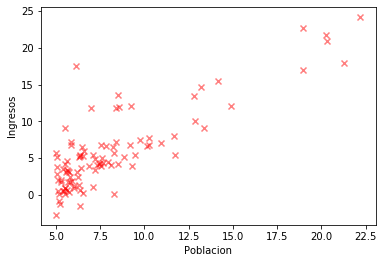

In [5]:
plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5)
plt.ylabel("Ingresos")
plt.xlabel("Poblacion")
plt.show()

Regresion lineal a mano, probando valores 

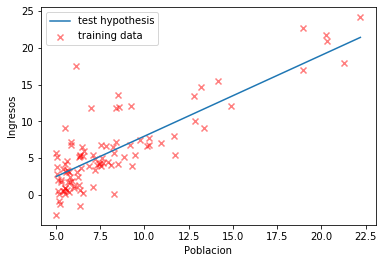

In [6]:
y_test = -3 + 1.1*x #Valores introducidos a mano probando

plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.5, label="training data")
plt.plot(x,y_test, label="test hypothesis")
plt.ylabel("Ingresos")
plt.xlabel("Poblacion")
plt.legend()
plt.show()

Hacer una regresion tras prueba y error lleva varios minutos en un caso sencillo, para uno complejo puede ser imposible realizarlo a mano 

Para calcular el coste de la funcion (el error que tiene con los valores) usamos una funcion de coste, en este caso **Error Cuadratico** 

Cost function

$J(\theta_{0},\theta_{1}) = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^{2}}$

Los valores de Theta seran los usados en la funcion $f_{w,b}(x) = wx + b $

Empezar con algun valor para $\theta_{0},\theta_{1}$ por ejemplo (0,0) o valores aleatorios

In [7]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y)
    return np.dot(Aux.T,Aux) / (2* len(X))

def gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta

def descenso_gradiente(X,Y,alpha,Theta):
    return gradiente(X,Y,Theta,alpha), coste(X,Y,Theta)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

Theta final: [-3.57499494  1.16080722]
Coste final: 4.486339661241505


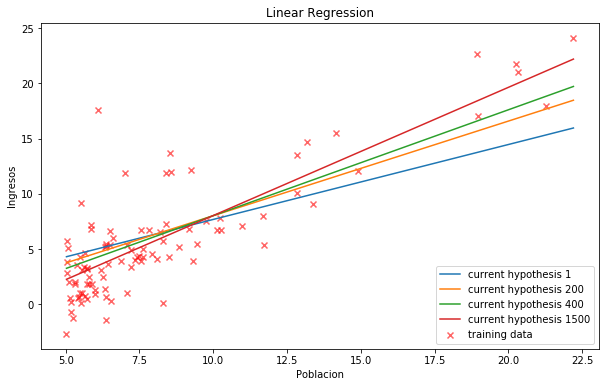

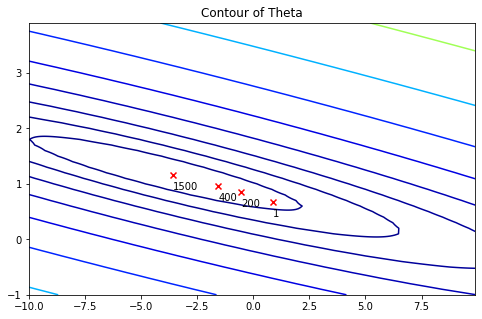

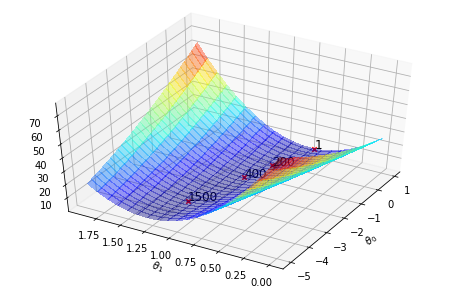

In [9]:
#mostramos valores intermedios de la regresion lineal
mostrar = [1,200,400,1500]

#tamaño de figura aumentado
plt.figure(figsize=(10,6))

#alpha bajo para dar saltos pequeños
alpha = 0.01

#Thetas aleatorios, el resultado no dependa de donde inicia, si no del modelo
Theta = np.array([np.random.random(),np.random.random()])

data_contour = make_data([-10,10],[-1,4],X,Y)
data_3d = make_data([-5,1],[0,2],X,Y) 

#fig 1 linear regression
plt.figure(1, figsize=(10,6))
plt.scatter(X[:,-1], Y, c='r', marker='x', alpha=0.6, label="training data")
plt.title("Linear Regression")
plt.xlabel("Poblacion")
plt.ylabel("Ingresos")

#fig 2 contour data
plt.figure(2, figsize=(8,5))
plt.title("Contour of Theta")
plt.contour(data_contour[0], data_contour[1], data_contour[2], np.logspace(-2, 3, 20), cmap=cm.jet)

#fig 3 3d plot of theta & cost
fig = plt.figure(3, figsize=(8,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(data_3d[0], data_3d[1], data_3d[2], cmap=cm.jet, linewidth=0, antialiased=False, alpha=0.4)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.view_init(45, 210)

for i in range(1500):
        #nuevas thetas y error de descenso de gradiente
        Theta, costes = descenso_gradiente(X,Y,alpha,Theta)
        
        #funcion de la regresion lineal para el valor actual
        y = Theta[0] + Theta[1]*x
        if i+1 in mostrar:
            
            plt.figure(1)
            plt.plot(x,y, label="current hypothesis {}".format(i+1))
            plt.legend(loc='lower right')
            
            plt.figure(2)
            plt.scatter(Theta[0], Theta[1], marker='x', c='r', label='Cost')
            plt.annotate(i+1, xy=(Theta[0], Theta[1]), # put the label with its point
            xytext=(0, -15), # but slightly offset
            textcoords='offset points')
            
            plt.figure(3)
            ax.scatter(Theta[0], Theta[1], costes, c='r', label='Cost', marker='x')
            rcParams.update({'font.size': 12})
            ax.text(Theta[0], Theta[1],costes, i+1, color='black') # put the label with its 3d point
            rcParams.update({'font.size': 10})
            #plt.show()
            
print("Theta final:",Theta)
print("Coste final:",costes)
plt.show()

## Modelo de Regresion Linear de sklearn, comparacion de predicciones

In [10]:
from sklearn.linear_model import LinearRegression
def train(x, y): 
    model = LinearRegression().fit(x,y)
    return model

#entrena el modelo con los valores de X e Y
model = train(X, Y)

#prueba del modelo
x_new = 13.0
y_model = Theta[0] + Theta[1]*x_new
y_sk = model.predict([[x_new,x_new]]) #X shape is (97,2) -> predict [x,x]?

print("Value of X = {}\nValue predicted with sklearn: {}".format(x_new,y_sk[0]),"\nValue predicted with our model:", y_model)

Value of X = 13.0
Value predicted with sklearn: 11.613656496152858 
Value predicted with our model: 11.515498883178907


# Linear Regression with multiple variables

En este caso, al ser los datos dispersos entre las diferentes variables se normalizara

Ademas la funcion de coste es algo mas compleja pues tenemos mas variables

$x^{(i)}$ indica siendo $i \in {0,1,2}$

$J(\theta) = \frac{1}{2m}(X\theta - \vec{y}^{\,})^{T}(X\theta - \vec{y}^{\,})$

In [11]:
datos = load_csv(fich="ex1data2.csv")
datos[:3]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05]])

In [12]:
X = datos[:, :-1]
np.shape(X) # (47, 2)

Y = datos[:, -1]
np.shape(Y) # (47,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

In [13]:
def normalize(X):
    '''Normaliza los datos de la matriz X
    restandoles su media y dividiendolos por la desviacion estandar'''
    mu = np.mean(X, axis=0)
    X_mean = X - mu
    sigma = np.std(X, axis=0)
    X_norm = X_mean / sigma
    return X_norm, mu, sigma

In [14]:
datos_norm, mu, sigma = normalize(datos)
print(datos_norm[:3])
X_norm = datos_norm[:, :-1]
np.shape(X_norm) # (47, 2)

Y_norm = datos_norm[:, -1]
np.shape(Y_norm) # (47,)
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

# añadimos una columna de 1's a la X
X_norm = np.hstack([np.ones([m, 1]), X_norm])



#Ahora tenemos una theta por cada variable de x
Theta = np.random.random(np.shape(X_norm)[1])

[[ 0.13141542 -0.22609337  0.48089023]
 [-0.5096407  -0.22609337 -0.08498338]
 [ 0.5079087  -0.22609337  0.23109745]]


In [15]:
alpha = 0.01
for i in range(1500):
        #nuevas thetas y error de descenso de gradiente
        Theta, costes = descenso_gradiente(X_norm,Y_norm,alpha,Theta)
print("Coste final de la regresion:",costes)
print("Valores finales de Theta:", Theta)

Coste final de la regresion: 0.13352757929574913
Valores finales de Theta: [ 7.52587814e-08  8.84318003e-01 -5.27308352e-02]


Coste para alpha 0.001: 0.387171980749603


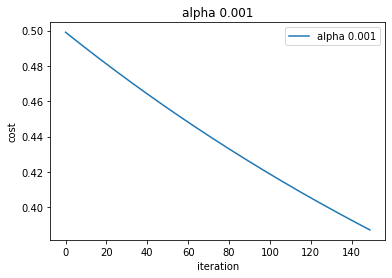

Coste para alpha 0.003: 0.26466542441623575


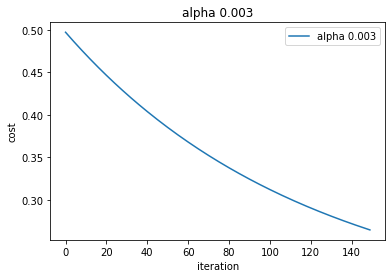

Coste para alpha 0.01: 0.16171485631538343


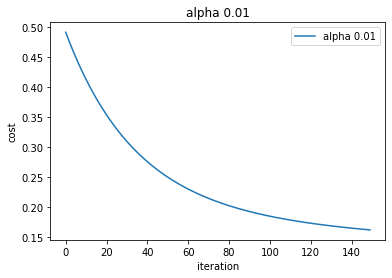

Coste para alpha 0.03: 0.1353239986876963


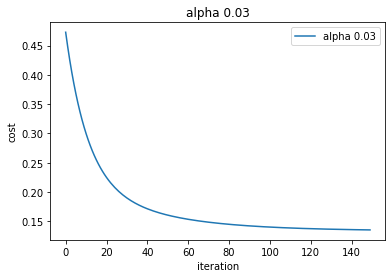

Coste para alpha 0.1: 0.13352762363343343


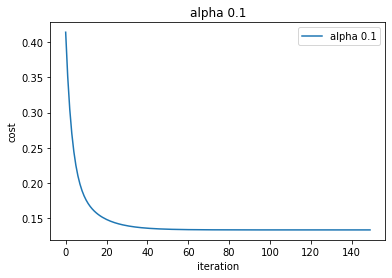

Coste para alpha 0.3: 0.13352749098554287


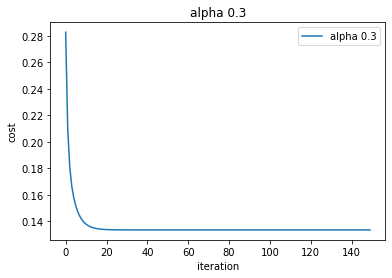

Coste para alpha 1: 0.13352749098554287


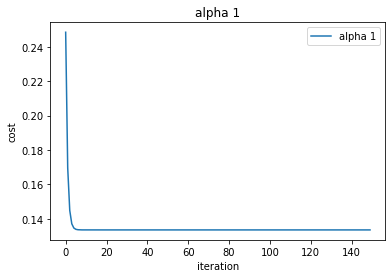

Coste para alpha 1.5: 3.610167634892588e+37


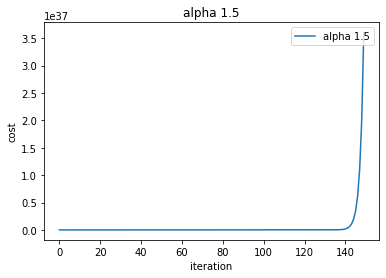

In [16]:
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 1.5]
for alpha in alphas:
    Theta_test = np.zeros(np.shape(X_norm)[1])
    cost_list = []
    for i in range(150):
        Theta_test, costes = descenso_gradiente(X_norm,Y_norm,alpha,Theta_test)
        cost_list.append(costes)
    plt.title("alpha {}".format(alpha))
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.plot(cost_list, label='alpha {}'.format(alpha))
    plt.legend(loc='upper right')
    print("Coste para alpha {}: {}".format(alpha,costes))
    plt.show()

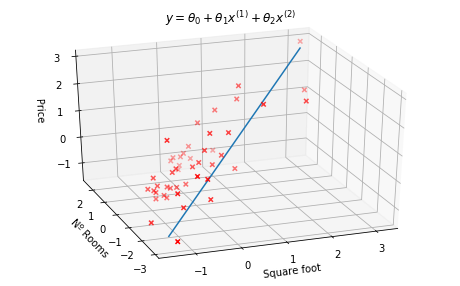

In [17]:
#3d plot of linear regresion  with multiple variables 
fig = plt.figure(figsize=(8,5))

ax = fig.gca(projection='3d')
ax.set_title(r'$y = \theta_{0} + \theta_{1}x^{(1)} + \theta_{2}x^{(2)}$')
ax.set_xlabel("Square foot")
ax.set_ylabel("Nº Rooms")
ax.set_zlabel("Price") #valor a predecir
ax.view_init(30, 250)
ax.scatter(X_norm[:,1], X_norm[:,2],Y_norm, c='r', label='Cost', marker='x')

x_1 = np.linspace(min(X_norm[:,1]), max(X_norm[:,1]),47)
x_2 = np.linspace(min(X_norm[:,2]), max(X_norm[:,2]),47)
y = Theta[0] + Theta[1]*x_1 + Theta[2]*x_2

ax.plot(x_1,x_2,y)
plt.show()

Resolver por el metodo de la ecuacion normal

$\theta = (X^{T}X)^{-1} X^{T}\vec{y}{\,}$

In [18]:
def normal_equation(X, Y):
    Aux1 = np.matmul(X.T,X)
    I = np.linalg.pinv(Aux1)
    Aux2 = np.matmul(I,X.T)
    return np.matmul(Aux2,Y)

Theta_normal = normal_equation(X,Y)
print(coste(X,Y,Theta_normal))
print(Theta_normal)

2043280050.6028283
[89597.90954355   139.21067402 -8738.01911255]


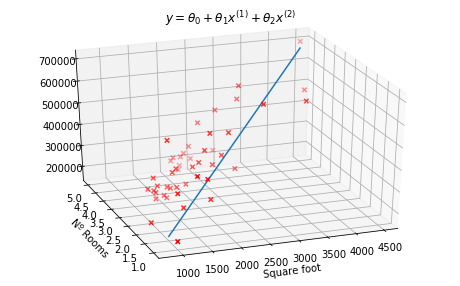

In [19]:
#3d plot of linear regresion  with multiple variables 
fig = plt.figure(figsize=(8,5))

ax = fig.gca(projection='3d')
ax.set_title(r'$y = \theta_{0} + \theta_{1}x^{(1)} + \theta_{2}x^{(2)}$')
ax.set_xlabel("Square foot")
ax.set_ylabel("Nº Rooms")
#ax.set_zlabel("Price") #valor a predecir
ax.view_init(30, 250)
ax.scatter(X[:,1], X[:,2],Y, c='r', label='Cost', marker='x')

x_1 = np.linspace(min(X[:,1]), max(X[:,1]),47)
x_2 = np.linspace(min(X[:,2]), max(X[:,2]),47)
y = Theta_normal[0] + Theta_normal[1]*x_1 + Theta_normal[2]*x_2

ax.plot(x_1,x_2,y)
plt.show()

In [20]:
casa = np.array([1650,3])

# Datos normalizados para modelo de descenso del gradiente
casa_norm = (casa - mu[:-1])
casa_norm = casa_norm / sigma[:-1]

# Probamos el descenso del gradiente y desnormalizamos el resultado
gradient_predict = np.matmul(np.append(np.array([1]),casa_norm), Theta) * sigma[-1]
gradient_predict = gradient_predict + mu[-1]

# Probamos la ecuación normal
normal_predict = np.matmul(np.append(np.array([1]),casa), Theta_normal)

print("Descenso gradiente:",gradient_predict)
print("Ecuacion normal:",normal_predict)

Descenso gradiente: 293093.66259732714
Ecuacion normal: 293081.464334972
